<a href="https://colab.research.google.com/github/MiitaliGupta/MachineLearning/blob/main/K-Mean%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Mean Clustering**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization
import io
import os

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/MiitaliGupta/MachineLearning/main/Datasets/NASA_OrbitingBodies.csv')
x = dataset.iloc[:, [2, 4]].values
dataset

,Id,Name,Estimated Diameter,Diameter Category,Relative Velocity,Velocity Cayegory,Hazardous
0,2162635,162635 (2000 SS164),2.679415,Too High,13569.24922,Too Low,False
1,2277475,277475 (2005 WK4),0.594347,Too High,73588.72666,Too High,True
2,2512244,512244 (2015 YE18),1.614507,Too High,114258.69210,Too High,False
3,3596030,(2012 BV13),0.215794,High,24764.30314,Too Low,False
4,3667127,(2014 GE35),0.570217,Too High,42737.73376,Low,True
...,...,...,...,...,...,...,...
1495,3623682,(2013 AF53),0.029788,Too Low,29246.86613,Too Low,False
1496,3789124,(2017 VD2),0.297879,High,53337.88160,High,False
1497,3842597,(2019 KN2),0.022596,Too Low,49376.05522,High,False
1498,3879292,(2019 UN2),0.054205,Low,27317.89329,Too Low,False


###Preprocessing

**Encoding character values**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])
x[:,1] = le.fit_transform(x[:,1])

In [ ]:
print(x)

[[ 481.   46.]
 [ 348. 1205.]
 [ 450. 1465.]
 ...
 [  67.  739.]
 [ 131.  280.]
 [ 477.  483.]]


###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler() 
# x= x.reshape(-1,1) 
x = sc.fit_transform(x)  
# x_test = sc.transform(x_test)  

In [ ]:
print(x)

[[ 2.14404373 -1.62466402]
 [ 1.0270656   1.05193242]
 [ 1.88369544  1.65237684]
 ...
 [-1.33286565 -0.02424872]
 [-0.79537242 -1.08426405]
 [ 2.1104504  -0.61545552]]


##
 **Importing the K-mean clustering classifier from sklearn**

Scikit-learn is a free machine learning library for Python. It features several regression, classification and clustering algorithms.

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## ELBOW METHOD

The elbow method is used to determine the number of clusters in the dataset. We pick the number of clusters to use by picking the elbow of the curve as the number of clusters to use.

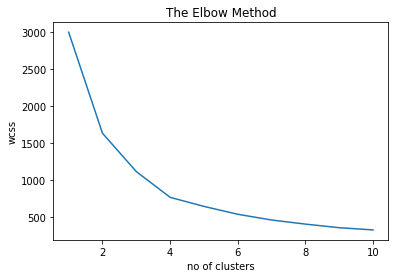

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

The elbow of the curve is at 4, therefore the number of clusters is 4

##Implementing K-means clustering

In [ ]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

## Plotting the graph


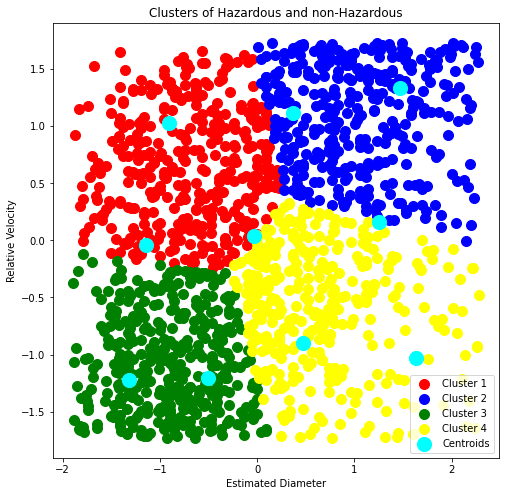

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'cyan', label = 'Centroids')
plt.title('Clusters of Hazardous and non-Hazardous')
plt.xlabel('Estimated Diameter')
plt.ylabel('Relative Velocity')
plt.legend()
plt.show()

##<b>Interpretation:</b>


As is visible by the graph above, all the accumulated points have been divided by colour coding, into 5 different categories- <b>red, blue, green, yellow and cyan</b>.<br>
1. <b>Red:</b> This is representative of the <b>Cluster 1</b> category of the estimate of the level of hazardousness of the astronomical bodies. This bodies characteristically contain particularly high relative velocities and low estimated diameters.<br>
2. <b>Blue: </b>This is representative of the <b>Cluster 2</b> category of the estimate of the level of hazardousness of the astronomical bodies. This bodies characteristically contain particularly high relative velocities and high estimated diameters. <br>
3. <b>Green:</b> This is representative of the <b>Cluster 3</b> category of the estimate of the level of hazardousness of the astronomical bodies. This bodies characteristically contain particularly low relative velocities and low estimated diameters.<br>
4. <b>Yellow:</b> This is representative of the <b>Cluster 4</b> category of the estimate of the level of hazardousness of the astronomical bodies. This bodies characteristically contain particularly low relative velocities and high estimated diameters.<br>
5. <b>Cyan: </b>These points throughout the graph indicate the centroids of each of the mentioned clusters. A centroid is typically an arithmetic mean of the points laid down in the region.<br>
<br>From the above analysis, we can conclude that-<br>
(a) The astronomical bodies entailed in <b>Cluster 2</b> category or with <b>Blue</b> colour are hazardous in nature for our planet<br>
(b) The astronomical bodies entailed in <b>Cluster 3</b> category or with <b>Green</b> colour are not at all hazardous in nature for our planet<br>
(c) The astronomical bodies entailed in <b>Cluster 1</b> and <b>Cluster 4</b> categories or with <b>Red</b> and <b>Yellow</b> colour are not as hazardous in nature as Cluster 1 for our planet<br>
(d) We can calculate the estimated amount of hazardousness for a particular cluster group or a particular area of such points by the centroid provided (in <b> cyan</b>) in the graph.